In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from pathlib import Path
from keras.preprocessing.image import load_img
import cv2
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=40,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_ds = train_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/dataset/train',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical',
    subset="training",
    seed=123
)

validation_ds = val_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/dataset/train',
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    subset="validation",
    seed=123
)


test_ds = train_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/dataset/test_mixed',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical'
)

Found 1350 images belonging to 30 classes.
Found 330 images belonging to 30 classes.
Found 420 images belonging to 30 classes.


In [ ]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

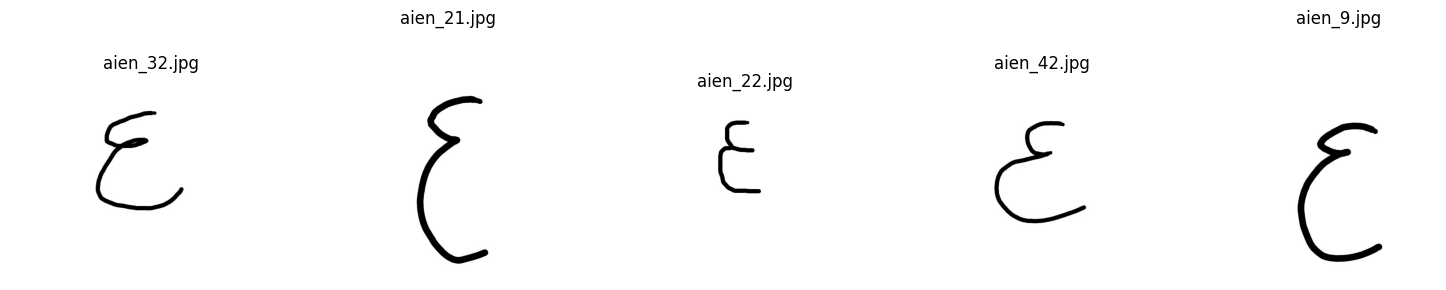

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/dataset/train/ain"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

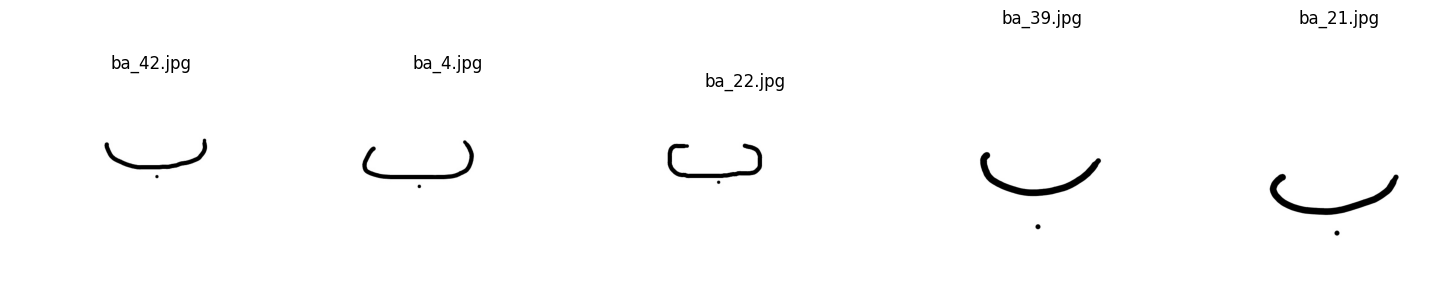

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/dataset/train/ba"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

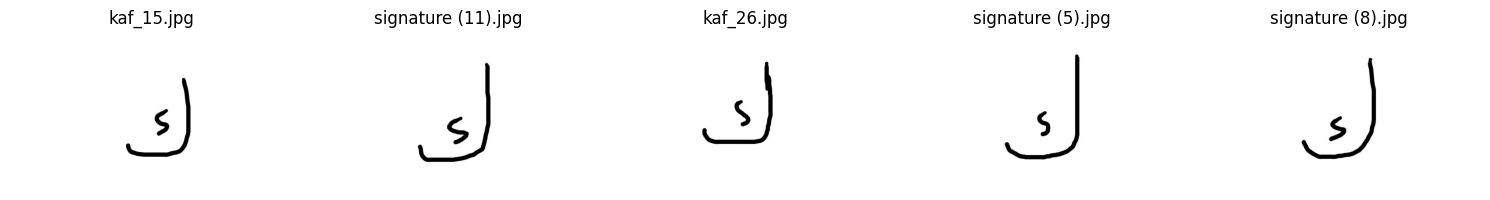

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/dataset/train/kaf"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [ ]:
# Load the pre-trained EfficientNetB4 model without the top classification layer
MobileNetV2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')

# Freeze the pre-trained base model layers
MobileNetV2_base.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Build the model
model = Sequential()

# Add the pre-trained Xception base
model.add(MobileNetV2_base)

# Batch Normalization
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.35))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(60, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(30, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 220)               281820    
                                                                 
 dense_1 (Dense)             (None, 60)                13260     
                                                                 
 dense_2 (Dense)             (None, 30)                1

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
# # Define the callback function
early_stopping = EarlyStopping(patience=10)

history= model.fit(train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
43/43 [==============================] - 930s 22s/step - loss: 3.4664 - accuracy: 0.0756 - val_loss: 3.2217 - val_accuracy: 0.1091
Epoch 2/100
43/43 [==============================] - 21s 490ms/step - loss: 2.9101 - accuracy: 0.2030 - val_loss: 2.8848 - val_accuracy: 0.2697
Epoch 3/100
43/43 [==============================] - 21s 486ms/step - loss: 2.4790 - accuracy: 0.3370 - val_loss: 2.5608 - val_accuracy: 0.3545
Epoch 4/100
43/43 [==============================] - 24s 550ms/step - loss: 2.1521 - accuracy: 0.4267 - val_loss: 2.2393 - val_accuracy: 0.4576
Epoch 5/100
43/43 [==============================] - 22s 513ms/step - loss: 1.8885 - accuracy: 0.5044 - val_loss: 1.9274 - val_accuracy: 0.5303
Epoch 6/100
43/43 [==============================] - 23s 531ms/step - loss: 1.6777 - accuracy: 0.5415 - val_loss: 1.6564 - val_accuracy: 0.5909
Epoch 7/100
43/43 [==============================] - 22s 516ms/step - loss: 1.4553 - accuracy: 0.6037 - val_loss: 1.4161 - val_accuracy: 

11/11 [==============================] - 1s 115ms/step - loss: 0.3089 - accuracy: 0.8939


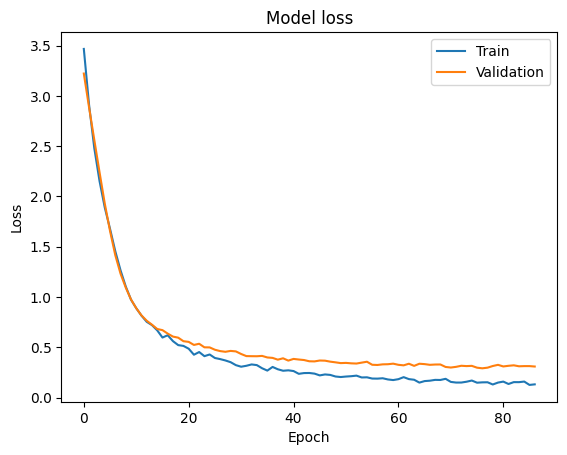

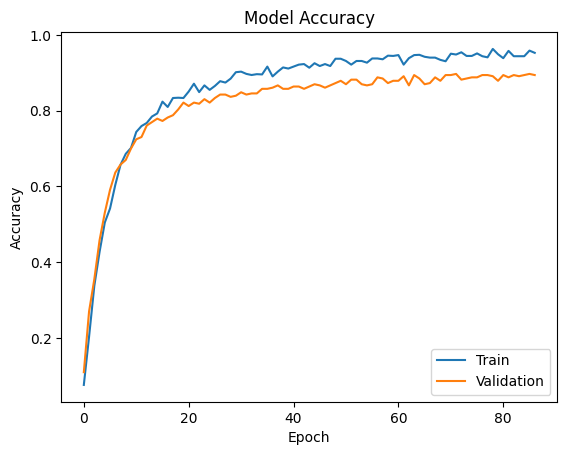

In [ ]:
# evaluate the model
loss = model.evaluate(validation_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

1/1 [==============================] - 0s 31ms/step


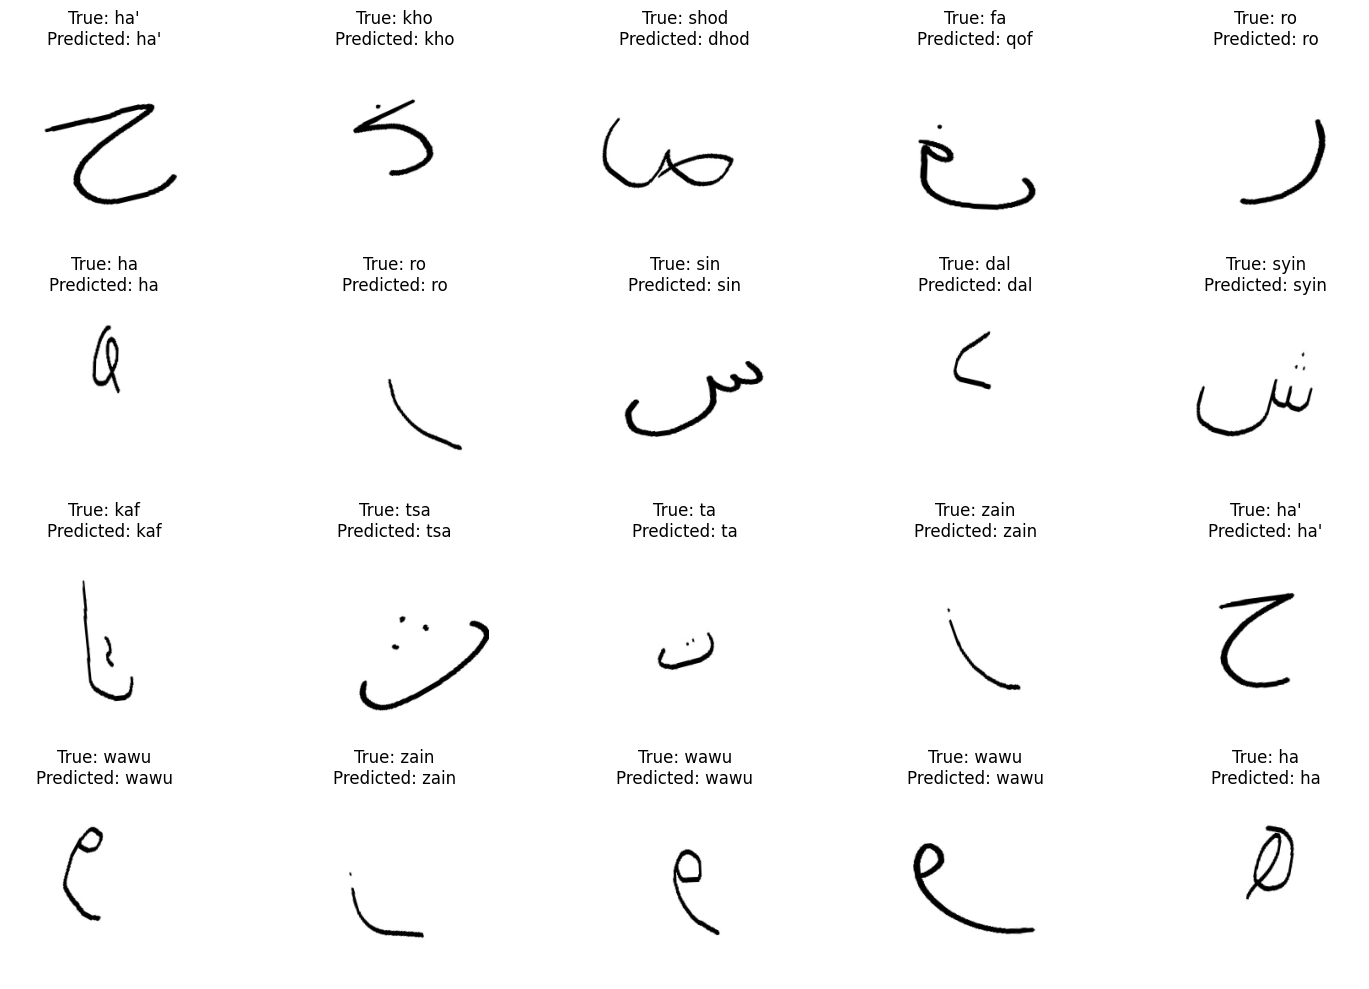

In [ ]:
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)

    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]

            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model to an H5 file
model.save('/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/models/model_mm9.h5')

# Convert the model to TensorFlow Lite format
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/models/model_mm9.h5')

# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/models/model_mm9.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been successfully converted to TensorFlow Lite format and saved as model.tflite")


Model has been successfully converted to TensorFlow Lite format and saved as model.tflite


In [ ]:
# uji model

In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os

In [3]:
MODEL_PATH = "/content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/models/model_mm9.h5"
final_model = tf.keras.models.load_model(MODEL_PATH)
print(f"Model loaded from {MODEL_PATH}")

Model loaded from /content/drive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/models/model_mm9.h5


In [4]:
def preprocess_image_as_array(image_path, show_output=True):
    im = Image.open(image_path).convert('RGB')
    im = im.resize((224, 224))

    if show_output:
        plt.figure(figsize=(8, 8))
        plt.imshow(im)
        plt.axis('off')
        plt.show()

    return np.asarray(im)

def predict_image_class(model, img_array, class_names):
    img_batch = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_batch)
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    if predicted_class_index < len(class_names):
        predicted_class = class_names[predicted_class_index]
        print(f"Predicted class: {predicted_class}")
        return predicted_class
    else:
        print(f"Predicted class index {predicted_class_index} out of range for class names")
        return None


Class names: ['ain', 'alif', 'ba', 'dal', 'dhod', 'dzal', 'dzho', 'fa', 'ghoin', 'ha', "ha'", 'hamzah', 'jim', 'kaf', 'kho', 'lam', 'lamalif', 'mim', 'nun', 'qof', 'ro', 'shod', 'sin', 'syin', 'ta', 'tho', 'tsa', 'wawu', 'ya', 'zain']


Saving Tangkapan Layar 2024-06-02 pukul 09.55.52.png to Tangkapan Layar 2024-06-02 pukul 09.55.52.png

Processing image: Tangkapan Layar 2024-06-02 pukul 09.55.52.png


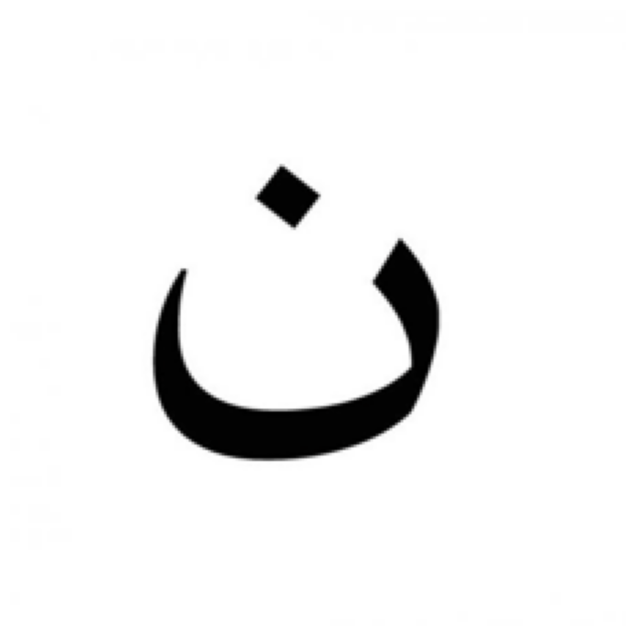

1/1 [==============================] - 1s 1s/step
Predicted class: qof
Predicted class for Tangkapan Layar 2024-06-02 pukul 09.55.52.png: qof


In [5]:
def upload_and_predict_image(model, class_names):
    uploaded = files.upload()

    for image_name in uploaded.keys():
        print(f"\nProcessing image: {image_name}")
        img_array = preprocess_image_as_array(image_name)
        predicted_class = predict_image_class(model, img_array, class_names)
        if predicted_class is not None:
            print(f"Predicted class for {image_name}: {predicted_class}")
        else:
            print(f"Failed to predict class for {image_name}")

# Mengambil class names dari dataset training
# Harap pastikan ini adalah daftar nama kelas yang benar-benar digunakan dalam dataset Anda
class_names = [ 'ain', 'alif', 'ba', 'dal', 'dhod', 'dzal',
                'dzho', 'fa', 'ghoin', 'ha', 'ha\'', 'hamzah', 'jim',
                'kaf', 'kho', 'lam', 'lamalif', 'mim', 'nun', 'qof',
                'ro', 'shod', 'sin', 'syin', 'ta', 'tho', 'tsa',
                'wawu', 'ya', 'zain']
print(f"Class names: {class_names}")

# Mengunggah dan memprediksi gambar
upload_and_predict_image(final_model, class_names)